# Optimization

Finding maxima and minima of a function $f(x)$.


## Motivation

Many problems in engineering involve optimization. There will be often a set of constraints and an objective, and the engineer wil need to achieve optimally the objective (maximize speed, effectiveness, minimize cost) within the constraints. We will learn here how to combine those.

In general, an engineer will encounter optimization problems which involve:

* An _objective function_
* _Design variables_.
* _Constraints_

# One-dimensional unconstrained optimization

## Newton's method

Basically, finding the zeros of $f'(x)$ through Newton-Rhapson. Therefore, we need to be able to calculate $f''(x)$.

### Example

Use Newton’s method to find the
maximum of

$$f(x) = 2 sin(x) − \frac{x^2}{2} $$

Use

$$x_0 = 2.5$$

We will need $f'(x)$ and $f''(x)$. Luckily, these ones are easy:

$$f'(x) = 2cos(x) - x$$

$$f''(x) = -2sin(x) - 1$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return 2 * np.sin(x) - (x ** 2) / 2

def f_prime(x):
    return 2 * np.cos(x) - x

def f_primeprime(x):
    return -2 * np.sin(x) - 1

With that, we can just copy over the `newton_raphson` function from section 02 and apply it to our current problem:

In [4]:
def newton_raphson(f, f_prime, x_0=0, e_s=1e-5, max_iter=100, history=(), debug=False):
    '''Calculate a zero of f by closing in on it using the gradient'''
    n=0
    e_a = 1e9 
    
    while n < max_iter and e_a > e_s:
        n += 1
        x_1 = x_0 - (f(x_0) / f_prime(x_0))
        e_a = abs(x_1 - x_0)
        history += (x_1,)
        x_0 = x_1
    
    return x_1, history

maximum, history = newton_raphson(f_prime, f_primeprime, 2.5)
maximum, history

(1.029866529322259,
 (0.6327304232916271,
  1.0817625428130564,
  1.0303387747040045,
  1.0298665715985984,
  1.029866529322259))

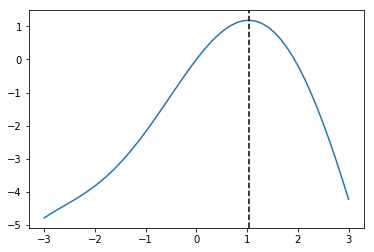

In [5]:
xs = np.linspace(-3, 3)
ys = f(xs)


plt.plot(xs, ys)
plt.axvline(maximum, linestyle='--', c='black');

# Multidimensional unconstrained optimization

It's much the same, but now our function will take a vector instead of a scalar.

$$f\left(\underline{x} \right): \Bbb{R}^n \rightarrow \Bbb{R}$$

* Direct Methods: or _nongradient_, because they don't require that we evaluate the derivative.

* Gradient Methods: Also known as _descent_ methods. We need a derivative.

## Direct Methods

### Random Search

Or brute force. It can work for discontinuous, non-differentiable functions. However, it is extremely computationally expensive.

In [6]:
# Potentially make them write a random search, depending on how the class goes.

### Heuristic approaches

They try to make educated guesses instead of guessing wildly.

* Genetic Algorithms
* Simulated Annealing
* Tabu Search
* Artificial Neural Networks.


## Gradient Methods

The gradient indicates the maximum growth direction, while the Hessian matrix indicates the convexity.


<img src="http://ludovicarnold.altervista.org/wp-content/uploads/2015/01/gradient-trajectory.png" alt="Gradient descent" style="width: 600px; float: left;"/>

TODO: include the [Hessian](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian) and an explanation of why its determinant shows convexity.

If we can't calculate the derivatives, we can approximate them numerically.

TODO: understand section4 slides 18-23 (Taylor series, Newton's method for multiavariate case) 

### Newton's method and Gradient Descent

While Newton's method converges very fast, it requires knowledge of the second derivative. When an analytical expression is not available, computing the second derivative numerically is computationally very expensive, and prone to numerical error. Therefore, Newton's method is rarely used for highly multidimensional optimization problems like those found in Machine Learning.

In contrast, gradient descent only requires knowledge of the first derivative, so it is one of the most widely used optimization approaches in Machine Learning.



### Plotting Bidimensional functions 

We need to create a meshgrid. 

See [pyplot.contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html) and [numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html#numpy.meshgrid)

Example: 

$$f(x) = e^{-(x - 1)^2 - (y-1)^2}$$

```python
xs = np.linspace(-3, 3)
ys = np.linspace(-3, 3)
xs, ys = np.meshgrid(xs, ys)

zs = np.exp(-(xs - 1)**2 - (ys - 1)**2)
plt.contour(xs, ys, zs);

```

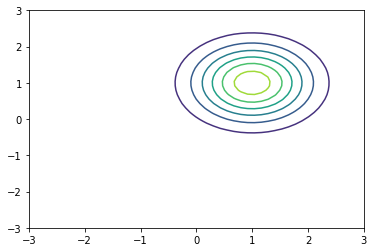

In [7]:
xs = np.linspace(-3, 3)
ys = np.linspace(-3, 3)
xs, ys = np.meshgrid(xs, ys)

zs = np.exp(-(xs - 1)**2 - (ys - 1)**2)
plt.contour(xs, ys, zs);

#### Exercise

Plot 

$$ f(x,y) = x^2 - y^2$$

using a contour plot.

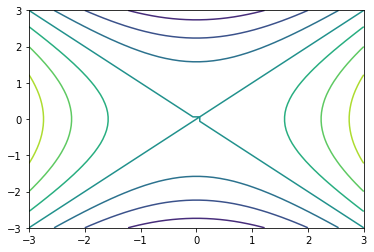

In [8]:
zs = xs ** 2 - ys **2
plt.contour(xs, ys, zs);

### Example 

Consider

$$f(x,y) = 2xy + 3x + 5y^3 + x^ 2$$

* Find all critical points analytically.
* For each point, decide whether it’s a maximum, a minimum or a saddle point.
* Perform 3 iterations of the Newton method using $(x_0 , y_0) = (−3, 0)$.
* Plot it using `numpy` and `matplotlib`.

In [9]:
# TODO: do the example

# Constrained optimization 

* Objective function
* Restrictions

## Linear programming

Objective function and constraints are all linear.

"Programming" here is used as "scheduling", not "computer programming".

#### Example

Suppose that a gas-processing plant receives a fixed
amount of raw gas each week. The raw gas is
processed into two grades of heating gas: regular
and premium quality. These grades of gas are in
high demand (i.e., we can take for granted that
they’ll sell as much as they produce) and yield
different profits to the company. However, their
production involves both time and on-site storage
constraints. For example, only one of the grades can
be produced at a time, and the facility is open only
for 80 hr./week. Further, there is limited on-site
storage for each of the products. All these factors
are listed in the following table:

|Resource| Regular Gas| Premium gas| Resource availability|
|--------|------------|------------|----------------------|
|Raw gas | 7 $m^3/ton$| 11$m^3/ton$| 77$m^3/week$|
|Production time | 10 $hr/ton$ | 8 $hr/ton$| 80$hr/week$|
|Storage | 9 $ton$| 6 $ton$ ||
|Profit | 150 $€/ton$| 175  $€/ton$||




Objective function: profit

$$z = 150 x_1 + 175 x_2$$

Constraints:

$$7 x_1 + 11 x_2 \leq 77$$

$$10 x_1 + 8 x_2 \leq 80$$

$$x_1 \leq 9$$

$$x_2 \leq 6$$

$$x_1 \geq 0$$

$$x_2 \geq 0$$


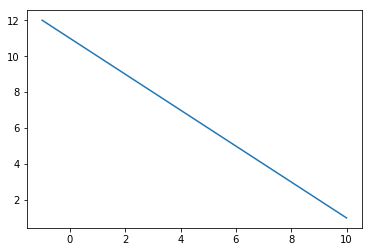

In [16]:
x1s = np.linspace(-1, 10)
x2s = np.linspace(-1, 10)

constraint_1 = (77 - 7*x1s) / 7

plt.plot(x1s, constraint_1);

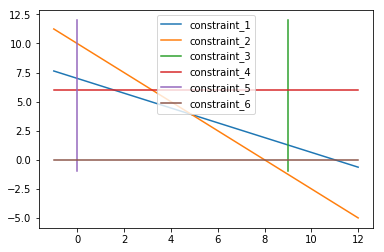

In [27]:
x1s = np.linspace(-1, 12)
x2s = np.linspace(-1, 12)

constraint_1 = (77 - 7 * x1s) / 11
constraint_2 = (80 - 10 * x1s) / 8
constraint_3 = 9
constraint_4 = 6
constraint_5 = 0
constraint_6 = 0

plt.plot(x1s, constraint_1, label="constraint_1")
plt.plot(x1s, constraint_2, label="constraint_2")
plt.plot([constraint_3] * len(x2s), x2s, label="constraint_3")
plt.plot(x1s, [constraint_4] * len(x1s), label="constraint_4")
plt.plot([constraint_5] * len(x2s), x2s, label="constraint_5")
plt.plot(x1s, [constraint_6] * len(x1s), label="constraint_6")

plt.legend();

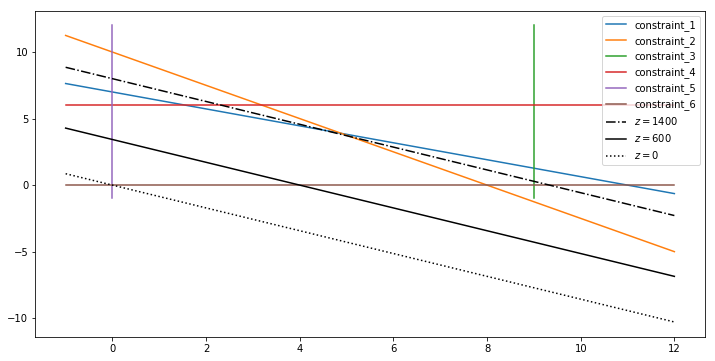

In [36]:
x1s = np.linspace(-1, 12)
x2s = np.linspace(-1, 12)

constraint_1 = (77 - 7 * x1s) / 11
constraint_2 = (80 - 10 * x1s) / 8
constraint_3 = 9
constraint_4 = 6
constraint_5 = 0
constraint_6 = 0
objective_1400 = (1400 - 150 * x1s) / 175
objective_600 = (600 - 150 * x1s) / 175
objective_0 = (0 - 150 * x1s) / 175

plt.plot(x1s, constraint_1, label="constraint_1")
plt.plot(x1s, constraint_2, label="constraint_2")
plt.plot([constraint_3] * len(x2s), x2s, label="constraint_3")
plt.plot(x1s, [constraint_4] * len(x1s), label="constraint_4")
plt.plot([constraint_5] * len(x2s), x2s, label="constraint_5")
plt.plot(x1s, [constraint_6] * len(x1s), label="constraint_6")

plt.plot(x1s, objective_1400, label="$z = 1400$", color="black", linestyle="-.")
plt.plot(x1s, objective_600, label="$z = 600$", color="black", linestyle="-")
plt.plot(x1s, objective_0, label="$z = 0$", color="black", linestyle=":")

plt.gcf().set_size_inches(12,6)
plt.legend();

### Posible situations

* Unique solution.

* Alternate solutions.

* No feasible solution.

* Unbounded problems.

### The simplex method

As we just saw, the optimal point will be an extreme point. The simplex method relies on this to find optimal solutions. It does this by reformulating the constraints to be equalities. It does this by introducing _slack variables_.

## Nonlinear programming

* Indirect methods
* Direct methods: generalized gradient search

# Problems

#### Exercise

The trajectory of a ball can be described by:

$$y =(tan\theta_0)x - \frac{g}{2v_0^2cos^2\theta_0}x^2 + y_0$$

where $y$ = the height (m), $\theta_0$ = the initial angle (radians), $v_0$ = the initial velocity (m/s), $g$ = the gravitational constant $9.81 m/s^2$, and $y_0$ = the initial height (m). 

Use bisection search like we did in section 02 to find roots of equations, but this time to determine the maximum height given $y_0 = 1 m$, $v_0 = 25 m/s$ and $\theta_0= 50$. Iterate until the approximate error falls below $\epsilon_s = 1%$ using initial guesses of $x_l = 0$ and $x_u = 60 m$.

#### Exercise

Perform three iterations of the optimal gradient steepest descent method to locate the minimum of 

$$f(x, y) = −8x + x^2 + 12y + 4y^2 − 2x y$$

using initial guesses $x = 0$ and $y = 0$.

Plot the function and the steps you took.

#### Exercise

Given the following function,

$$f(x, y) = −8x + x^2 + 12y + 4y^2 − 2x y$$

use Python to determine the minimum:

* Graphically.
* Numerically.
* Substitute the result of (b) back into the function to determine the minimum $f (x, y)$.
* Determine the Hessian and its determinant, and substitute the result of part (b) back into the latter to verify that a minimum has been detected.

# Further reading

[Genetic Algorithms]

[Simulated Annealing]

[Tabu Search]

[Artificial Neural Networks]

[Newton's method versus gradient descent]

[Genetic Algorithms]: https://en.wikipedia.org/wiki/Genetic_algorithm
[Simulated Annealing]: https://www.mathworks.com/help/gads/what-is-simulated-annealing.html
[Tabu Search]: http://www.cleveralgorithms.com/nature-inspired/stochastic/tabu_search.html
[Artificial Neural Networks]: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.53329&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
[Newton's method versus gradient descent]: https://stats.stackexchange.com/questions/253632/why-is-newtons-method-not-widely-used-in-machine-learning